# Complex Vector Analysis

## Preliminaries

The first order of business is to import the necessary modules.  The following code requires a local installation of the "clifford" package at release level 1.4.0 or above.  In anaconda, this can be accomplished using the following command.
    
    conda install -c conda-forge clifford
    
The presents of module QuantumGA.py in the same directory as this notebook or a directory on the PYTHONPATH is also required.

In [1]:
from QuantumGA import _e1, _e2, _e3, _e12, _e13, _e23, _e123, _zero, _one 
from QuantumGA import places, linelen, randMV, cosh, sinh 
from numpy import e, pi

The next two commands affect the display formatting and can be changed at any time to satisfy the user's requirements.

In [2]:
places(8)
linelen(120)

Now define the primitive blades that we will be using.

In [3]:
e1 = _e1
e2 = _e2
e3 = _e3

e12 = _e12
e23 = _e23
e13 = _e13

e123 = _e123

i = e123
zero = _zero
one = _one

## Complex scalars and vectors

The Geometric Algebra of three-dimensional space has a graded structure. We can partition the basis elements into two sets, the "scalar" grades (0 and 3) and the "vector" grades (1 and 2).  By combining the scalar and pseudoscalar blades into a single unit we create a compound object that behaves like a complex number.  Combining the vector and bivector blades creates an object that behaves like a complex vector.  Some authors refer to this grade 1 and 2 object as a biparavector but we prefer to call it a complex vector or c-vector for short.

The scalar and vector components of a general multivector can be extracted in QuantumGA using the python properties operators .scalar and .vector

In [4]:
mv = randMV()
mv

-0.24600845 + 0.43114578*e1 - 0.75996296*e2 + 0.01542916*e3 - 0.19550387*e12 + 0.55206093*e13 - 0.04070957*e23 - 0.9715389*e123

In [5]:
mv.scalar

-0.24600845 - 0.9715389*e123

In [6]:
mv.vector

0.43114578*e1 - 0.75996296*e2 + 0.01542916*e3 - 0.19550387*e12 + 0.55206093*e13 - 0.04070957*e23

We wish to analyze this geometric object in greater detail. Our first consideration will be to separate it into vector and bivector components.  This is accomplished using the grade selection operators.

In [7]:
cv = mv.vector
a = cv(1)
ib = cv(2)

We might visualize this compound object composed of a random vector and bivector with the following picture.

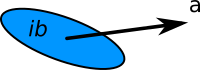

Much has been written about the algebra of complex numbers and their representation in Geometric Algebra using the pseudoscalar as a unit imaginary.  The algebra of complex vectors, on the other hand, has received far less attention.  This probably stems from its seemingly complicated structure and non-commutative algebra.  In this Python notebook we hope to introduce the tools and insight necessary to manipulate complex vectors in a simple and natural manner.

## Normalizing a complex vector

The standard technique for calculating the magnitude of a complex vector has its origin in complex algebra.  First multiply the object by its conjugate then take the square root of the result.  This always results in a real scalar suitable for measuring size.  However another way to calculate magnitude is available to us, the simple square root of the square.  For a real vector this operation produces the same result as the standard one but for a complex vector it can produce a complex scalar.

Using the QuantumGA library the standard (Euclidean) magnitude can be calculated with the .emag() function.  This is the same method found in the abs() function in numpy and the Clifford library.   

In [8]:
cv.emag()

1.0527671854051814

To calculate the complex magnitude of a complex vector we use the python .mag() function. 

In [9]:
cv.mag()

0.81249613 + 0.49105174*e123

Using this complex magnitude we can normalize a complex vector by simple division.  The .normal() function does this for us.  

In [10]:
cv.normal()

0.36649335*e1 - 0.98588196*e2 - 0.09260853*e3 - 0.18465108*e12 + 0.08362116*e13 - 0.27160346*e23

On first glance this object doesn't seem any different than the unnormalized complex vector it came from.  However, it has important properties that we shall now examine in detail.  The first thing to verify is that it truely is a unit c-vector and that it squares to exactly one.  

In [11]:
nv = cv.normal()
nv**2

1.0

## Unit complex vector geometry

We would like to find out more about these unit complex vectors.  As with a general c-vector we can separate out the vector and bivector components using grade selection operators.

In [12]:
a = nv(1)
ib = nv(2)

The magnitude of each component can be computed separately.

In [13]:
a.mag()

1.05586787

In [14]:
ib.mag()

0.33890553*e123

Now it may not be obvious to the casual observer, but the sum of the squares of these two magnitudes is exactly one.

In [15]:
a.mag()**2 + ib.mag()**2

1.0

Therefore the magnitude of the vector component is the hyperbolic cosine of some number and the magnitude of the bivector component is the hyperbolic sine of that same number.  We can extract this number from a unit c-vector using the .getRapid() function.

In [16]:
r = nv.getRapid()

We display the hyperbolic cosine and sine of this internal rapidity which can be compared to the results in lines 13 and 14 above.  

In [17]:
cosh(r) + i*sinh(r)

1.05586787 + 0.33890553*e123

Another important feature of a unit c-vector is the fact that the vector component lies entirely within the plane of the bivector.  We demonstrate this feature using the wedge product.

In [18]:
a^ib

0.0

In Geometric Algebra we usually suppress the use of "polar" vectors, preferring to operate with bivectors which possess the same transformational porperties.  However in the present situation it behoves us to consider the dual-vector of a bivector instead.  This "polar" vector can be extracted by dualizing the bivector extracted above.


In [19]:
b = nv(2)/i

Because the vector component of a unit c-vector lies in the plane of the bivector the plane's dual-vector is perpendicular to it.  We demonstrate this fact using the vector inner product.  

In [20]:
b|a

0.0

The resulting picture is of a squared-up vector and bivector.

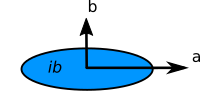

We can express this picture with the equation <center>$\hat{f}=\hat{a}\cosh(r)+i\hat{b}\sinh(r)$<center>

## The hyperbolic ellipse

Taken together, the vector component and the dual-vector components of a unit c-vector can be used to define a simple ellipse.  The semi-major axis is given by the vector component and the semi-minor axis is given by the dual-vector.  Rapidity in this model defines the aspect ratio of this ellipse.  

 To picture this ellipse, first we rotate the two vectors into the plane of the page.

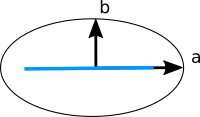

Next we apply successive transformations of the type $\hat{f}^{\prime}=e^{i\theta}\hat{f}$ while plotting the updated length and position of the $\textbf{a}$ vector.  It is found that this vector traces out an elliptical path as it rotates clockwise around the figure.  The dual-vector $\textbf{b}$ takes an similar path around the circuit always trailing the $\textbf{a}$ vector by some degrees (not always 90).    

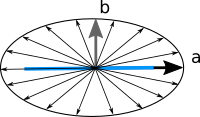

The *elliptical* nature of a unit c-vecor is readily apparent yet at the same time this object's aspect ratio is a *hyperbolic* angle.  We are thus compelled to describe a normalized c-vector as a "hyperbolic ellipse."

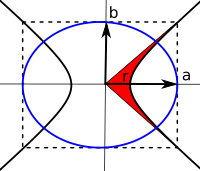

For a given plane containing both vectors $\textbf{a}$ and $\textbf{b}$ there exists a family of nested ellipses parameterized by the hyperbolic angle.  The figure above displays one such ellipse in blue and its corresponding rapidity in red.

## Euler's formula

By definition a unit c-vector squares to one.  This means that it can be exponentiated in the same manner as a unit vector.  This fact allows us to extend Euler's formula to include complex vectors.  First we consider a general c-vector as its unitary form times its magnitude.

<center>$F = \hat{f}\alpha$<center>

where $\hat{f}$ is a unit c-vector and $\alpha$ is its complex magnitude.  The exponential of this complex vector is calculated in the usual way using a Taylor expansion.

<center>$e^F=1+\hat{f}\alpha+\frac{\alpha^2}{2!}+\frac{\hat{f}\alpha^3}{3!}+\frac{\alpha^4}{4!}+\frac{\hat{f}\alpha^5}{5!}+ \ ...$<center>

Separating the odd from the even powers we arrive at the cononical form for the exponential of a complex vector. 

<center>$e^F=\cosh(\alpha)+\hat{f}\sinh(\alpha)$<center>

Similarly the exponential of a negative c-vector is found to be

<center>$e^{-F}=\cosh(\alpha)-\hat{f}\sinh(\alpha)$<center>

We use this knowledge to extend the trigonometric identities that involve the exponential function.  

<center>$\cosh(F)=\large{\frac{e^F+ \ e^{-F}}{2}}$<center>
<center>$\sinh(F)=\large{\frac{e^F- \ e^{-F}}{2}}$<center>
<center>$\tanh(F)=\large{\frac{e^F- \ e^{-F}}{e^F+ \ e^{-F}}}$<center>

The remaining hyperbolic functions can be similarly defined.  Furthermore, because the magnitude a c-vector includes an imaginary component these definitions subsume those for the normal triginometric functions, sine, cosine, and tangent.

In python we can calculate the hyperbolic cosine of a complex vector using the first formula.

In [21]:
(e**cv+e**-cv)/2

1.18927902 + 0.42670345*e123

The QuantumGA library provides python functions that can operate on complex vectors, using it we can find the hyperbolic cosine of a c-vector directly.  

In [22]:
cosh(cv)

1.18927902 + 0.42670345*e123

Using these tools we can treat complex vectors in much the same way as we do their real cousins.  But as we have shown c-vectors are not vectors they are hyperbolic ellipses, new and intriguing objects in their own right. 

## The geometric product of complex vectors

The geometric algebra of complex vectors is remarkably similar to the algebra of real vectors if approached with a slightly broader mindset.  One of the great achievements in the development of Geometric Algebra was the unification of the disparate dot, wedge, and commutator products into a single all encompasing geometric product.  Let's examine the effects these operations have on c-vectors.      

In [23]:
cv1 = randMV().vector
cv2 = randMV().vector

cv1*cv2

0.98855317 - 0.99940335*e1 + 0.09127671*e2 - 0.12457765*e3 + 0.37642866*e12 - 1.09899033*e13 - 0.57286068*e23 + 1.51090545*e123

Two c-vectors are created and their geometric product is displayed.  Notice that the result contains both vector and scalar elements.  Next we calculate the inner product of our two c-vectors.

In [24]:
cv1|cv2

0.98855317 - 0.99940335*e1 + 0.09127671*e2 - 0.12457765*e3

The result, unlike that of the vector inner product, produces a real paravector (grades 0 and 1).  

In [25]:
cv1^cv2

0.73321861*e12 - 0.59240149*e13 + 0.10309812*e23 + 1.51090545*e123

The outer product of c-vectors is an imaginary paravector (grades 2 and 3).  Because c-vectors contain bivector elements, the full geometric product must include a commutator product.  In QuantumGA the cummutator product of bivectors is implemented using the percent sign (%) as an operator.  

In [26]:
cv1%cv2

-0.35678995*e12 - 0.50658884*e13 - 0.6759588*e23

Note that when combining these three operations into a single expression it becomes necessary to surround each product with parentheses.  This is due to operator precedence issues internal to python. 

In [27]:
(cv1|cv2) + (cv1^cv2) + (cv1%cv2)

0.98855317 - 0.99940335*e1 + 0.09127671*e2 - 0.12457765*e3 + 0.37642866*e12 - 1.09899033*e13 - 0.57286068*e23 + 1.51090545*e123

## Reflections and rotations

Rotations in Geometric Algebra are usually developed by combining vector reflections.  Unfortunately there is no agreed-upon method for demonstrating this connection.  Because of its direct applicability to c-vectors we choose to closely follow the construction used in "Geometric Algebra for Computer Sciance" at the beginning of chapter 7.    

<center>Reflection of a vector in the dual hyperplane $\textbf{a}: \ \textbf{x} \mapsto \textbf{-axa}^{-1}$</center>

This technique works whether the vector $\textbf{a}$ is real or complex.  The result in the complex case however is a c-vector.  

In [28]:
-cv1*e1*1/cv1

-0.48811688*e1 - 0.89765518*e2 + 1.3559033*e3 + 0.81930193*e12 - 1.03681313*e13 + 0.36916059*e23

The single vector $e_1$ has been split into a real and an imaginary vector by reflection.

  Rotations are built up from multiple reflections.

<center>$\textbf{x} \mapsto \textbf{b(-axa}^{-1}\textbf{)b}^{-1} = \textbf{ba}^{-1}\textbf{x} \ \textbf{(ab)}^{-1} = \textbf{(b/a)} \ \textbf{x} \ \textbf{b/a}^{-1}$</center>

In [29]:
cv2*cv1*e1*1/cv1*1/cv2

1.61015719*e1 + 1.99610129*e2 - 0.68596804*e3 + 2.06023678*e12 + 0.3398612*e13 + 1.29903712*e23

Successive reflections can be combined into a rotation and applied in the same way $\textbf{x} \mapsto R \ \textbf{x} \ R^{-1}$.

In [30]:
R = cv2/cv1
R*e1*1/R

1.61015719*e1 + 1.99610129*e2 - 0.68596804*e3 + 2.06023678*e12 + 0.3398612*e13 + 1.29903712*e23

To avoid using a division operation it is standard practice to normalize the rotation operator.  For a complex rotation this means calculating the rotor using normalized c-vectors.  Unlike the case with real rotors the square of a complex rotor is calculated using the bar-operator (Clifford conjugation) for inversion.  We use this bar-product here to verify that our rotor is infact unitary.

In [31]:
R = cv2.normal()/cv1.normal()
R*R.bar()

1.0

We apply our normalized complex rotor to a vector using a bar-product too.      

In [32]:
R*e1*R.bar()

1.61015719*e1 + 1.99610129*e2 - 0.68596804*e3 + 2.06023678*e12 + 0.3398612*e13 + 1.29903712*e23

In the standard treatment the above operation is performed using reversion but this does not work for complex rotors.  Fortunately the bar-operator also inverts standard rotors which is a strong argument for its use in all cases.  

## Realization

If we cannot use reversion (tilde-operator) to invert rotors any more then what do we use it for?  It is found that multiplying a multivector times its reverse always produces a real multivector (grades 0 and 1), sometimes called a paravector.  This aspect of the tilde-product is unimportant in real vector spaces but is a critical operation in complex spaces.  Here the tilde-product reduces a complex multivector into a real one.  We refer to this operation as "realization."     

In [33]:
(cv1*cv2)*~(cv1*cv2)

5.96037839 - 3.36446576*e1 + 4.39654412*e2 - 1.20089861*e3

Students of quantum physics will recognize this construct as equivalent to the Dirac outer product.  The QuantumGA library implements this operation with the .oprod() method or its alias .tprod().

In [34]:
(cv1*cv2).oprod()

5.96037839 - 3.36446576*e1 + 4.39654412*e2 - 1.20089861*e3

The Dirac inner product also *realizes* a complex product into a real but possibly different paravector.

In [35]:
(cv1*cv2).iprod()

5.96037839 - 4.04954096*e1 + 2.60626532*e2 + 2.98328453*e3

The Measurement process in quantum physics is simulated mathematically by calculating an expectation value.  This operation extracts elements of the Dirac outer product using a measurement operator **M**.  Expectation value =$\ \big{<}\Psi\big{|}\textbf{M}\big{|}\Psi\big{>}$.  The QuantumGA library implements this operation using the .expect() operator.  The state vector $\Psi$ is, in this case, the product of two c-vectors. 

In [36]:
(cv1*cv2).expect(e1)(0)

-3.36446576

Here we have extracted the $\textbf{e}_1$ value from the outer product shown two lines above.

## Parallel and perpendicular decomposition

The most common use for the tilde-product is to apply a Lorentz transformation such as a rotation or a boost.  A simple example of which, the rotation of a vector (w) in the plane normal to another vector (v) can be given by the equation

<center>$\textbf{w} \mapsto e^{i\hat{\textbf{v}}\theta} \ \textbf{w} \ e^{\sim i\hat{\textbf{v}}\theta}$.</center>

As has been pointed out by many authors a rotation of this nature can be separated out into two parts, the portion included in the plane of rotation (i$\hat{\textbf{v}}$) and the portion perpendicular to the plane.  The rotation operator leaves the perpendicular part of the vector unchanged and acts doubly on the parallel part. 

<center> $e^{i\hat{\textbf{v}}\theta} \ \textbf{w} \ e^{\sim i\hat{\textbf{v}}\theta} = \textbf{w}_{\parallel \hat{v}} \ + \ e^{i\hat{\textbf{v}}2\theta}\textbf{w}_{\perp \hat{v}}$</center>

Here we identify the portion of the vector $\textbf{w}$ that is perpendicular to the $i\hat{\textbf{v}}$ plane and therefore parralel to the $\hat{\textbf{v}}$ unit vector as $\textbf{w}_{\parallel\hat{v}}$.  As similar notation is applied the portion of the vector that is within the plane of rotation $\textbf{w}_{\perp\hat{v}}$.

In the QuantumGA library we can use the .para() and .perp() functions to extract the parallel and perpendiculate components of a multivector.  We can create a random vector then separate out the portion parallel to $\textbf{e}3$ as follows.

In [37]:
w = randMV()(1)
w

-0.93349199*e1 + 0.97388169*e2 - 0.03691388*e3

In [38]:
w.para(e3)

-0.03691388*e3

The portion of vector $\textbf{w}$ that is perpendicular to $\textbf{v}$ is similarly found. 

In [39]:
w.perp(e3)

-0.93349199*e1 + 0.97388169*e2

Together the parallel and perpendicular portions of the vector make up the whole vector as is obvious in this simple case.  Using these functions we can implement the above rotation after first defining a simple rotor.

In [40]:
r = e**(i*e3*pi/6)
r*w*~r

0.37666029*e1 + 1.29536862*e2 - 0.03691388*e3

Then by applying this rotor twice to only the perpendicular component of our vector we demonstrate the desired equivalency.

In [41]:
w.para(e3) + r*r*w.perp(e3)

0.37666029*e1 + 1.29536862*e2 - 0.03691388*e3

## Real boosts

Another form of realization is a relativistic boost, which is implemented using the exponential of a vector instead of a bivector.  Much of the previous discussion about rotors can be applied directly to boosts.  We apply a boost using the sandwich product just like a rotor.

<center>$\textbf{w} \mapsto e^{\hat{\textbf{v}}\lambda} \ \textbf{w} \ e^{\sim \hat{\textbf{v}}\lambda}$.</center>

While the tilde operator has no affect on the right exponent, it is included here for comparison with rotation.  Like a rotation, a boost operates doubly on one portion of the vector and has no effect on the other portion.  However in this case the situation is reversed in that the parallel portion is acted upon and the perpendicular portion is ignored.

<center> $e^{\hat{\textbf{v}}\lambda} \ \textbf{w} \ e^{\sim \hat{\textbf{v}}\lambda} = e^{\hat{\textbf{v}}2\lambda}\textbf{w}_{\parallel \hat{v}} + \textbf{w}_{\perp \hat{v}}$</center>

To demonstrate this we first define a simple boost and apply it to our previous vector using the sandwich product.

In [42]:
b = e**(e1/2)
b*w*~b

-1.0970409 - 1.44045341*e1 + 0.97388169*e2 - 0.03691388*e3

The equivalence can then be easily displayed. 

In [43]:
b*b*w.para(e1) + w.perp(e1)

-1.0970409 - 1.44045341*e1 + 0.97388169*e2 - 0.03691388*e3

As was the case with rotations this splitting of a boost into parallel and perpendicular components is applicable to multivectors in general.  

An important consolidation can be accomplished if a boost and a rotation share a common vector.  In this case the parallelism and perpendicularity is with respect to the same vector.  Here we can combine the rotation with the boost into a single yet separable operation.  

<center>$e^{\hat{\textbf{v}}(\lambda+i\theta)} \ \textbf{w} \ e^{\sim \hat{\textbf{v}}(\lambda+i\theta)} = e^{\hat{\textbf{v}}2\lambda} \ \textbf{w}_{\parallel\hat{v}} \ + \ e^{i\hat{\textbf{v}}2\theta} \ \textbf{w}_{\perp\hat{v}}$</center>

We might create a combination rotation and boost and apply it to our work vector as follows.

In [44]:
s = e**(e1*1/2+i*e1*pi/6)
s*w*~s

-1.0970409 - 1.44045341*e1 + 0.45497249*e2 - 0.86186322*e3

Next we comfirm the separable nature of this product by calculating the sum of the individual parts. 

In [45]:
e**(e1)*w.para(e1) + e**(e1*i*pi/3)*w.perp(e1)

-1.0970409 - 1.44045341*e1 + 0.45497249*e2 - 0.86186322*e3

## Complex boosts

It would be certainly be convienient if we could apply the above logic to boosts and rotations that do not share a common vector.  Using complex vectors we can do just that.  All we have to do is to make a small modification to our notion of parallelism and perpendicularity so as to include c-vectors.    

We introduce the notion of tilde-parallelism and tilde-perpendicularity using functions .tpara() and .tperp().  Paralellism with respect to a vector $\textbf{v}$ is defined as $\frac{1}{2}(M+\textbf{v} M \textbf{v})$, where $\textbf{M}$ is a general multivector.  Tilde-parallelism is defined as $\frac{1}{2}(M+\textbf{v} M \tilde{\textbf{v}})$.  Where the tilde diacritic denotes multivector reversion.  Tilde-perpendicularity is calculated in a similar manner using a minus sign instead.  For a real vectors these functions produce the same result as above.

In [46]:
e**(e1)*w.tpara(e1) + e**(e1*i*pi/3)*w.tperp(e1)

-1.0970409 - 1.44045341*e1 + 0.45497249*e2 - 0.86186322*e3

A complex boost is defined as the exponential of a complex vector and it is applied to a general multivector using the tilde-product.

<center>$\textbf{M} \mapsto e^{\hat{\textbf{f}}\alpha} \ \textbf{M} \ e^{\sim \hat{\textbf{f}}\alpha}$</center>

Where $\hat{f}$ is a normalized c-vector and $\alpha$ is a complex scalar.  In python we can produce such a product with the following code.

In [47]:
e**cv1*mv*e**~cv1

0.38998487 + 0.80863574*e1 - 0.05387891*e2 - 0.44546805*e3 + 3.55427938*e12 + 4.49993906*e13 - 0.97383613*e23 - 5.86770379*e123

As described earlier, a general c-vector is the product of a complex magnitude times a unit c-vector. In other words the sum of a scaled real c-vector and a scaled imaginary c-vector.  The exponential of a c-vector can thus be considered as the product of real and imaginary components.


<center>$e^{\hat{\textbf{f}}\alpha} = e^{\hat{\textbf{f}}(\lambda+i\theta)} = e^{\hat{\textbf{f}}\lambda} \ e^{i\hat{\textbf{f}}\theta}$</center>

Here the complex scalar $\alpha$ has been decomposed into its real and imaginary components $\lambda$ and $i\theta$.  Note that because a complex vector and its dual commute, the order of the two exponentials on the right is unimportant.

Just like we did with a real vector it is possible separate a complex boost into its parallel and perpendicular components using a unit c-vector.

<center>$e^{\hat{\textbf{f}}(\lambda+i\theta)} \ \textbf{M} \ e^{\sim \hat{\textbf{f}}(\lambda+i\theta)} = e^{\hat{\textbf{f}}2\lambda} \ \textbf{M}_{\parallel\hat{f}} \ + \ e^{i\hat{\textbf{f}}2\theta} \ \textbf{M}_{\perp\hat{f}}$</center>

To reproduce this operation in QuantumGA  we first separate our complex vector into its real and imaginary magnitude and calculate its normal.

In [48]:
a0 = cv1.mag()(0)
ia1 = cv1.mag()(3)
f = cv1.normal()

The complex boost can then be separately applied to the parallel and perpendicular components of a random multivector using the following code.

In [49]:
e**(2*f*a0)*mv.tpara(f) + e**(2*f*ia1)*mv.tperp(f)

0.38998487 + 0.80863574*e1 - 0.05387891*e2 - 0.44546805*e3 + 3.55427938*e12 + 4.49993906*e13 - 0.97383613*e23 - 5.86770379*e123

Which can be compared to the previous result by subtraction.

In [50]:
e**(2*f*a0)*mv.tpara(f) + e**(2*f*ia1)*mv.tperp(f) - e**cv1*mv*e**~cv1

0.0

Finally we mention that it is possible to decompose a complex boost into a sum of spin-up and spin-down components.  

<center>$e^{\hat{\textbf{f}}\alpha} = e^\alpha \big{|} \ \textbf{f}\big{>} + e^{-\alpha} \big{|} \ \bar{\textbf{f}}\big{>}$</center>

Here the spin state $\big{|} \ \textbf{f}\big{>}$ is defined as $\frac{1}{2}+\frac{1}{2}\hat{\textbf{f}}$ and the spin state $\big{|} \ \bar{\textbf{f}}\big{>}$ is defined as $\frac{1}{2}-\frac{1}{2}\hat{\textbf{f}}$.  Spin states of this format are equivalent to the general idempotents of $\mathbb{G}_3$ described by Dr. Garret Sobczyk in "*Geometry of Spin $\frac{1}{2}$ Particles*."  Readers are encouraged to examine that document for an in depth discussion of the subject.

## Summary

Complex vectors are ubiquitous in physical theory.  The equivalence of a c-vector to the Riemann–Silberstein vector $\textbf{E}+ic\textbf{B}$ is pretty obvious.  But as we have seen, when used to produce rotations and boosts, they are also the generators of the Lorentz group.  And when combined with a unit scalar they form the most general idempotents in the algebra of 3D space.  

Fortunately, with just a little modification around the edges, the geometric algebra of real vectors can be expanded to include complex vectors.  The addition of c-vectors to our geometric tookit opens up the world of complex vector spaces (Hilbert spaces) to further examination.